In [23]:
%matplotlib inline

In [24]:
import asyncio
from wraeblast import insights

In [25]:
from matplotlib import pyplot as plt
import pandas as pd

In [57]:
loop = asyncio.get_event_loop()
league = "Expedition"
ctx = await insights.initialize_filter_context(league=league)

2021-09-10 20:37.47 [info     ] cache.initialize               dir=./.insights_cache league=Expedition
2021-09-10 20:37.47 [debug    ] cache.hit                      league=Expedition type=Currency
2021-09-10 20:37.47 [debug    ] cache.hit                      league=Expedition type=Fragment
2021-09-10 20:37.47 [debug    ] cache.hit                      league=Expedition type=Artifact
2021-09-10 20:37.47 [debug    ] cache.hit                      league=Expedition type=BaseType
2021-09-10 20:37.47 [debug    ] cache.hit                      league=Expedition type=Beast
2021-09-10 20:37.47 [debug    ] cache.hit                      league=Expedition type=BlightedMap
2021-09-10 20:37.47 [debug    ] cache.hit                      league=Expedition type=ClusterJewel
2021-09-10 20:37.47 [debug    ] cache.hit                      league=Expedition type=DeliriumOrb
2021-09-10 20:37.47 [debug    ] cache.hit                      league=Expedition type=DivinationCard
2021-09-10 20:37.47 [debug   

In [63]:
ctx.currency.df[[
    "item_name", 
    "chaos_value", 
    "chaos_value_norm", 
    "quartile", 
    "quintile", 
    "decile", 
    "percentile",
]]

,item_name,chaos_value,chaos_value_norm,quartile,quintile,decile,percentile
0,Mirror of Kalandra,61482.41,11.026506,4,5,10,100
1,Mirror Shard,3188.73,8.067378,4,5,10,99
2,Tempering Orb,800.29,6.684974,4,5,10,97
3,Maven's Orb,758.20,6.630947,4,5,10,96
4,Awakener's Orb,586.18,6.373627,4,5,10,94
...,...,...,...,...,...,...,...
61,Armourer's Scrap,0.04,-3.218876,1,1,1,8
62,Orb of Transmutation,0.03,-3.506558,1,1,1,4
63,Blacksmith's Whetstone,0.03,-3.506558,1,1,1,5
64,Engineer's Orb,0.02,-3.912023,1,1,1,2


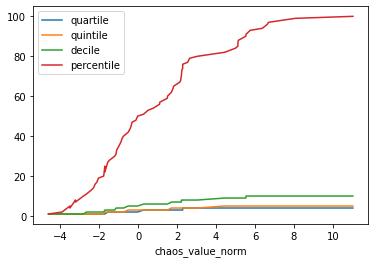

In [65]:
ax = ctx.currency.df.plot(x="chaos_value_norm", y=["quartile", "quintile", "decile", "percentile"])

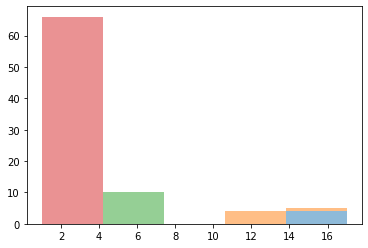

In [128]:
ax = plt.hist(
    [
        ctx.currency.df.quartile.value_counts(),
        ctx.currency.df.quintile.value_counts(),
        ctx.currency.df.decile.value_counts(),
        ctx.currency.df.percentile.value_counts(),
    ],
    bins=10,
    stacked=True,
    alpha=0.5,
)